Import libraries needed to run the code

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Read the pokemon dataset

In [5]:
# Uncomment this line to run program using git repository
# df_pokemon = pd.read_csv('./data/pokemon.csv')
df_pokemon = pd.read_csv('/kaggle/input/pokemon/pokemon.csv')

In [6]:
# Define power stats trying to follow the stats applied in the game
# src: https://bulbapedia.bulbagarden.net/wiki/Damage
# Define some medias to grow the accuracy of selection of the most powerful pokemons
poke_def_media = df_pokemon['defense'].median() + df_pokemon['sp_defense'].median()
poke_power_media = 1
poke_level = 100
# Add new columns which will help to get a more accuracy selection
df_pokemon['attack_power'] = df_pokemon['attack'] + df_pokemon['sp_attack']
df_pokemon['power_stat'] = (((2 * poke_level) / 5 + 2) *
                            poke_power_media *
                            (df_pokemon['attack_power'] / poke_def_media)) / 50 + 2


# Ordering the Pokemons by power stats
df_pokemon = df_pokemon.sort_values(
    by=['power_stat'],
    ascending=[False],
    kind='quicksort'
)

# Initilize library config to plot result
plt.figure()

# Get the top 100 most powerful
df_resumed = df_pokemon[['abilities', 'classfication', 'type1', 'type2', 'generation']].head(100)

# Initializing dictionaries that will be used to store the target information and reducing the scope
classification = {}
pokemon_type = {}
generation = {}
abilities = {}

<Figure size 640x480 with 0 Axes>

Calculating the number of appearances of each skill in the table and plotting the result

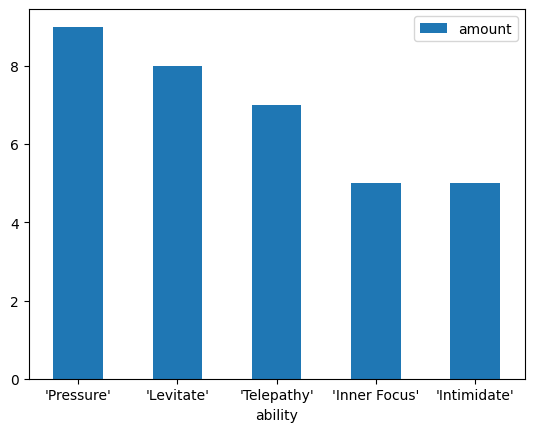

In [7]:
# ABILITIES counting
for index, row in df_resumed.iterrows():
    # Obtaining abilities of each Pokemon
    pokemon_abilities = row['abilities'].strip('][').split(', ')
    # Making the sum
    for pokemon_ability in pokemon_abilities:
        if pokemon_ability in abilities.keys():
            abilities[pokemon_ability] = abilities[pokemon_ability] + 1
            continue
        abilities[pokemon_ability] = 1
# Converting and ordering obtained data
abilities = dict(sorted(abilities.items(), key=lambda item:item[1], reverse=True))
top_abilities = pd.DataFrame(list(abilities.items()), columns=['ability', 'amount'])
top_abilities = top_abilities.head(5)

# Plot results
ax = top_abilities.plot.bar(x='ability', y='amount', rot=0)

Calculating the number of appearances of each generation in the table and plotting the result

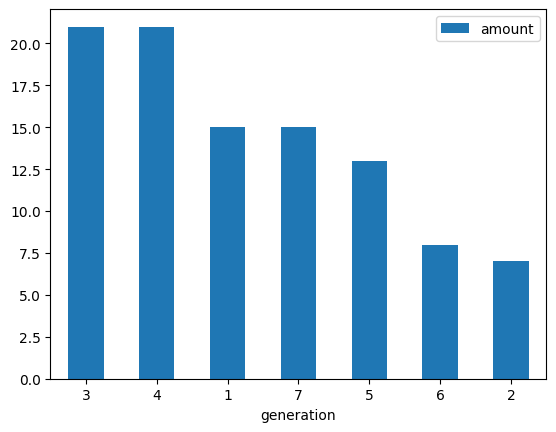

In [8]:
# GENERATION counting
for index, row in df_resumed.iterrows():
    # Obtaining abilities of each Pokemon
    pokemon_generation = row['generation']
    # Making the sum
    if pokemon_generation in generation.keys():
        generation[pokemon_generation] = generation[pokemon_generation] + 1
        continue
    generation[pokemon_generation] = 1
# Converting and ordering obtained data
generation = dict(sorted(generation.items(), key=lambda item:item[1], reverse=True))
gen_amount = pd.DataFrame(list(generation.items()), columns=['generation', 'amount'])
# Plot results
ax = gen_amount.plot.bar(x='generation', y='amount', rot=0)

Calculating the number of appearances of each pokemon type in the table and plotting the result

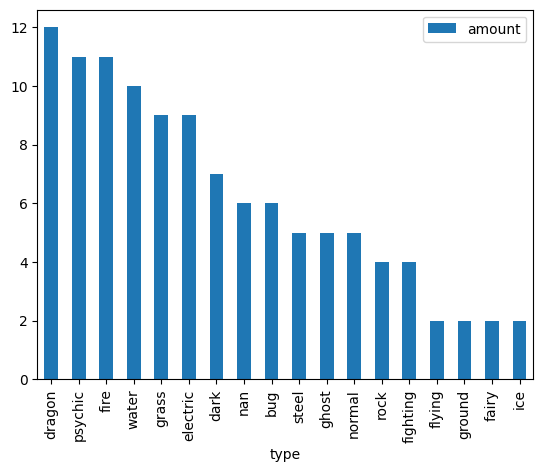

In [9]:
# TYPE counting
for index, row in df_resumed.iterrows():
    # Obtaining types of each Pokemon
    poke_type1 = row['type1']
    poke_type2 = row['type2']
    # Making the sum
    if poke_type1 in pokemon_type.keys():
        pokemon_type[poke_type1] = pokemon_type[poke_type1] + 1
        continue
    pokemon_type[poke_type1] = 1
    if poke_type2 in pokemon_type.keys():
        pokemon_type[poke_type2] = pokemon_type[poke_type2] + 1
        continue
    pokemon_type[poke_type2] = 1
# Converting and ordering obtained data
pokemon_type = dict(sorted(pokemon_type.items(), key=lambda item:item[1], reverse=True))
poke_type_amount = pd.DataFrame(list(pokemon_type.items()), columns=['type', 'amount'])
# Plot result
ax = poke_type_amount.plot.bar(x='type', y='amount', rot=90)